In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import ensemble, tree, linear_model
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.utils import shuffle
# from scipy import stats
# sns.set()


# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")



# 0. Load data

In [3]:
#load data
train = pd.read_csv('/Users/fangweilin/Desktop/housepriceprediction/train.csv')
test = pd.read_csv('/Users/fangweilin/Desktop/housepriceprediction/test.csv')

# 1.  Exploratory Data Analysis

## 1.1Overview of features and relation to target

### shape, info, head,describe and check whether any duplicates 

In [4]:
#get a first overview of the training data set(first five rows)
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


this is not real test data, I will extract about 30% of train data to use as test data.

In [5]:
#get a first overview of the testing data set(first five rows)

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#gives a summary of the statistics (only for numerical columns)
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#How many rows and columns 
train.shape,test.shape


((1460, 81), (1459, 80))

In [8]:
#check for duplicates for Id
idsUnique = len(set(train.Id))
#caculate total rows
idsTotal = train.shape[0]
#if idsdupe ==0, which means Id has no duplicates
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


### The target variable : Distribution of SalePrice


Skewness: 1.882876
Kurtosis: 6.536282


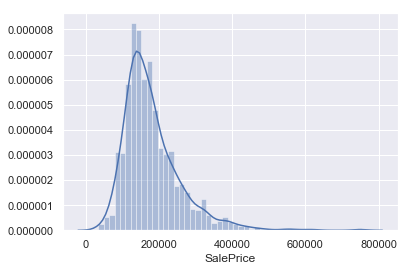

In [9]:
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

The target variable SalePrice is not normally distributed.
This can reduce the performance of the ML models because they assume normal distribution.
Therfore we make a log transformation, the resulting distribution looks much better.


Skewness: 0.121347
Kurtosis: 0.809519


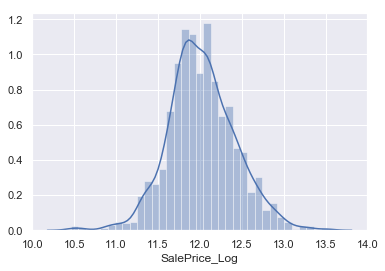

In [10]:
# make a log transformation
# add a new column " SalePrice_Log " 
train['SalePrice_Log'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % train['SalePrice_Log'].skew())
print("Kurtosis: %f" % train['SalePrice_Log'].kurt())
# dropping old column
train.drop('SalePrice', axis= 1, inplace=True)

In [11]:
#view this new SalePrice_log
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


### Numerical and Categorical features

In [12]:
#object not string
#numerical_feats is the index of numerical features
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [13]:
# show the names of numerical_feats and categorical_feats
print(train[numerical_feats].columns)
print("*"*93)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')
*********************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',


In [14]:
#view numerical features
train[numerical_feats].head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220


In [15]:
#view categorical features
train[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### List of features with missing values

In [16]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


For a few features, there are lots of NaN entries.
However, after reading data description, we konw that NaN id not missing data for PoolQC and means that the house has no pool. and it also works for 'PoolQC','MiscFeature','Alley','Fence' ...

### Filling missing value

In [17]:
# columns where NaN values have meaning e.g. no pool etc.
cols_meaning_fill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
#Fill NA/NaN values using the specified method _ fillna

for col in cols_meaning_fill:
    train[col].fillna('None',inplace=True)
    test[col].fillna('None',inplace=True)# we nill not use this test data !!!!!

In [18]:
#after replacing "NaN" with "None"
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice_Log,0,0.000000
ExterCond,0,0.000000


In [19]:
# fillna with mean (or mode)for the remaining values
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
# train.fillna(train.mode(), inplace=True)
# test.fillna(test.mode(), inplace=True)


In [20]:
#check missing value in training data
train.isnull().sum().sum()


0

### Features log transform

some of the feature values are not normally distributed and it is better to use log values in train and test. Checking for skewness and kurtosis:

In [21]:
# training data set
for col in numerical_feats:
    
    print(col)
    print("Skewness: %f" % train[col].skew())
    print("Kurtosis: %f" % train[col].kurt())
    print("*"*93)

Id
Skewness: 0.000000
Kurtosis: -1.200000
*********************************************************************************************
MSSubClass
Skewness: 1.407657
Kurtosis: 1.580188
*********************************************************************************************
LotFrontage
Skewness: 2.384950
Kurtosis: 21.848165
*********************************************************************************************
LotArea
Skewness: 12.207688
Kurtosis: 203.243271
*********************************************************************************************
OverallQual
Skewness: 0.216944
Kurtosis: 0.096293
*********************************************************************************************
OverallCond
Skewness: 0.693067
Kurtosis: 1.106413
*********************************************************************************************
YearBuilt
Skewness: -0.613461
Kurtosis: -0.439552
*********************************************************************************************
Y

Skewness: 1.366560
Kurtosis: 4.895121


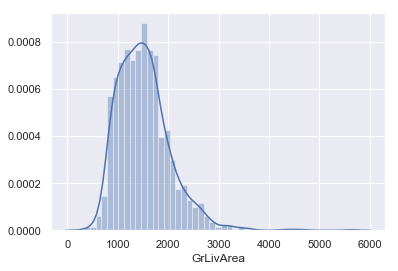

In [22]:
sns.distplot(train['GrLivArea']);
#skewness and kurtosis
print("Skewness: %f" % train['GrLivArea'].skew())
print("Kurtosis: %f" % train['GrLivArea'].kurt())

Skewness: 12.207688
Kurtosis: 203.243271


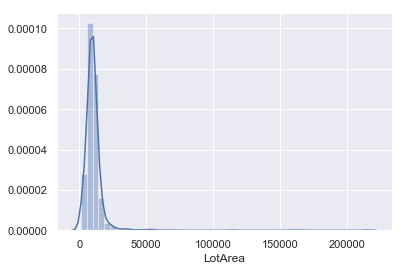

In [23]:
sns.distplot(train['LotArea']);
#skewness and kurtosis
print("Skewness: %f" % train['LotArea'].skew())
print("Kurtosis: %f" % train['LotArea'].kurt())

In [24]:
for df in [train]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
    
#numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index


In [25]:
train['GrLivArea_Log'].head()

0    7.444249
1    7.140453
2    7.487734
3    7.448334
4    7.695303
Name: GrLivArea_Log, dtype: float64

In [26]:
#numerical_feats is the index of numerical features

# for col in numerical_feats:
#     if abs(train[col].skew()) >= 2:
#             col_need_logTrans = col
#             train[col_need_logTrans] = np.log1p(train[col_need_logTrans])
#             print(col_need_logTrans)
#             print("Skewness: %f" % train[col_need_logTrans].skew())
#             print("*"*93)

    

Skewness: -0.006995
Kurtosis: 0.282603


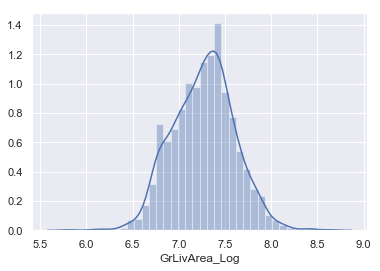

In [27]:
sns.distplot(train['GrLivArea_Log']);
#skewness and kurtosis
print("Skewness: %f" % train['GrLivArea_Log'].skew())
print("Kurtosis: %f" % train['GrLivArea_Log'].kurt())

In [28]:
#train['GrLivArea']
train.iloc[0:3,45:52]              #数据切片操作，切连续的数据块


,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual
0,1,0,2,1,3,1,Gd
1,0,1,2,0,3,1,TA
2,1,0,2,1,3,1,Gd


In [29]:
# # make a log transformation
# train['GrLivArea'] = np.log1p(train['GrLivArea'])
# sns.distplot(train['GrLivArea']);
# # skewness and kurtosis
# print("Skewness: %f" % train['GrLivArea'].skew())
# print("Kurtosis: %f" % train['GrLivArea'].kurt())


In [30]:
train.iloc[0:3,45:52]              


,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual
0,1,0,2,1,3,1,Gd
1,0,1,2,0,3,1,TA
2,1,0,2,1,3,1,Gd


In [31]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log,GrLivArea_Log,LotArea_Log
0,1,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699,7.444249,9.041922
1,2,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016,7.140453,9.169518
2,3,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171,7.487734,9.328123
3,4,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405,7.448334,9.164296
4,5,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220,7.695303,9.565214


# 1.2 Relation of features to target (SalePrice_log)

### Plot heatmap

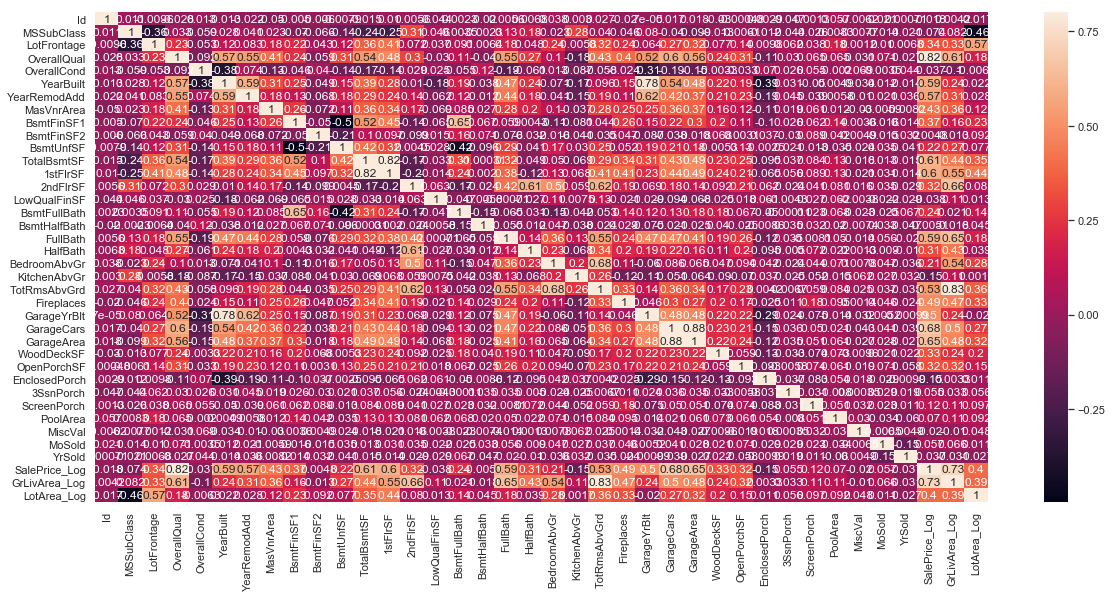

In [32]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

### List of numerical features and their correlation coefficient to target

In [33]:
#sort_values for series
abs(corrmat['SalePrice_Log']).sort_values(ascending=False)



SalePrice_Log    1.000000
OverallQual      0.817185
GrLivArea_Log    0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
LotArea_Log      0.399918
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: SalePr

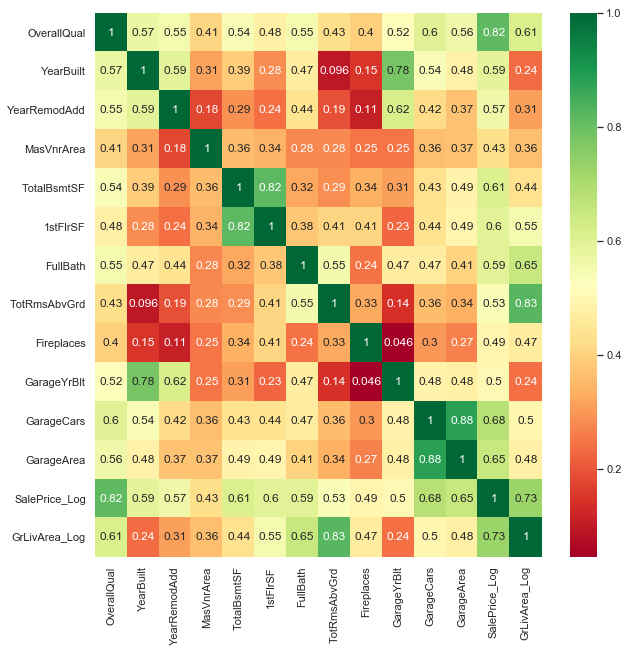

In [34]:
# most correlated features
# when we choose correlated features, what threshold would be better???
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice_Log"]) > 0.4]
least_corr_features = corrmat.index[abs(corrmat["SalePrice_Log"]) <= 0.4]

cols_abv_corr_limit = list(top_corr_features)
cols_bel_corr_limit = list(least_corr_features)

plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We see that for some features like 'OverallQual' there is a strong correlation to the target.
I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.
I chose the threshold = 0.4, and drop those features below this threshold.


We also see that the entries for some of the numerical columns are in fact categorical values.
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature ( see data description txt)

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor



In [35]:

corrmatMost = train[top_corr_features].corr()
abs(corrmatMost['SalePrice_Log']).sort_values(ascending=False)



SalePrice_Log    1.000000
OverallQual      0.817185
GrLivArea_Log    0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
Name: SalePrice_Log, dtype: float64

### List of categorical features and their unique values


In [36]:
for catg in list(categorical_feats) :
    print(train[catg].value_counts())#Returns object containing counts of unique values.
    print('*'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**************************************************
Pave    1454
Grvl       6
Name: Street, dtype: int64
**************************************************
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
**************************************************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**************************************************
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**************************************************
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**************************************************
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**************************************************
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
***************************

### Relation to SalePrice for all categorical features

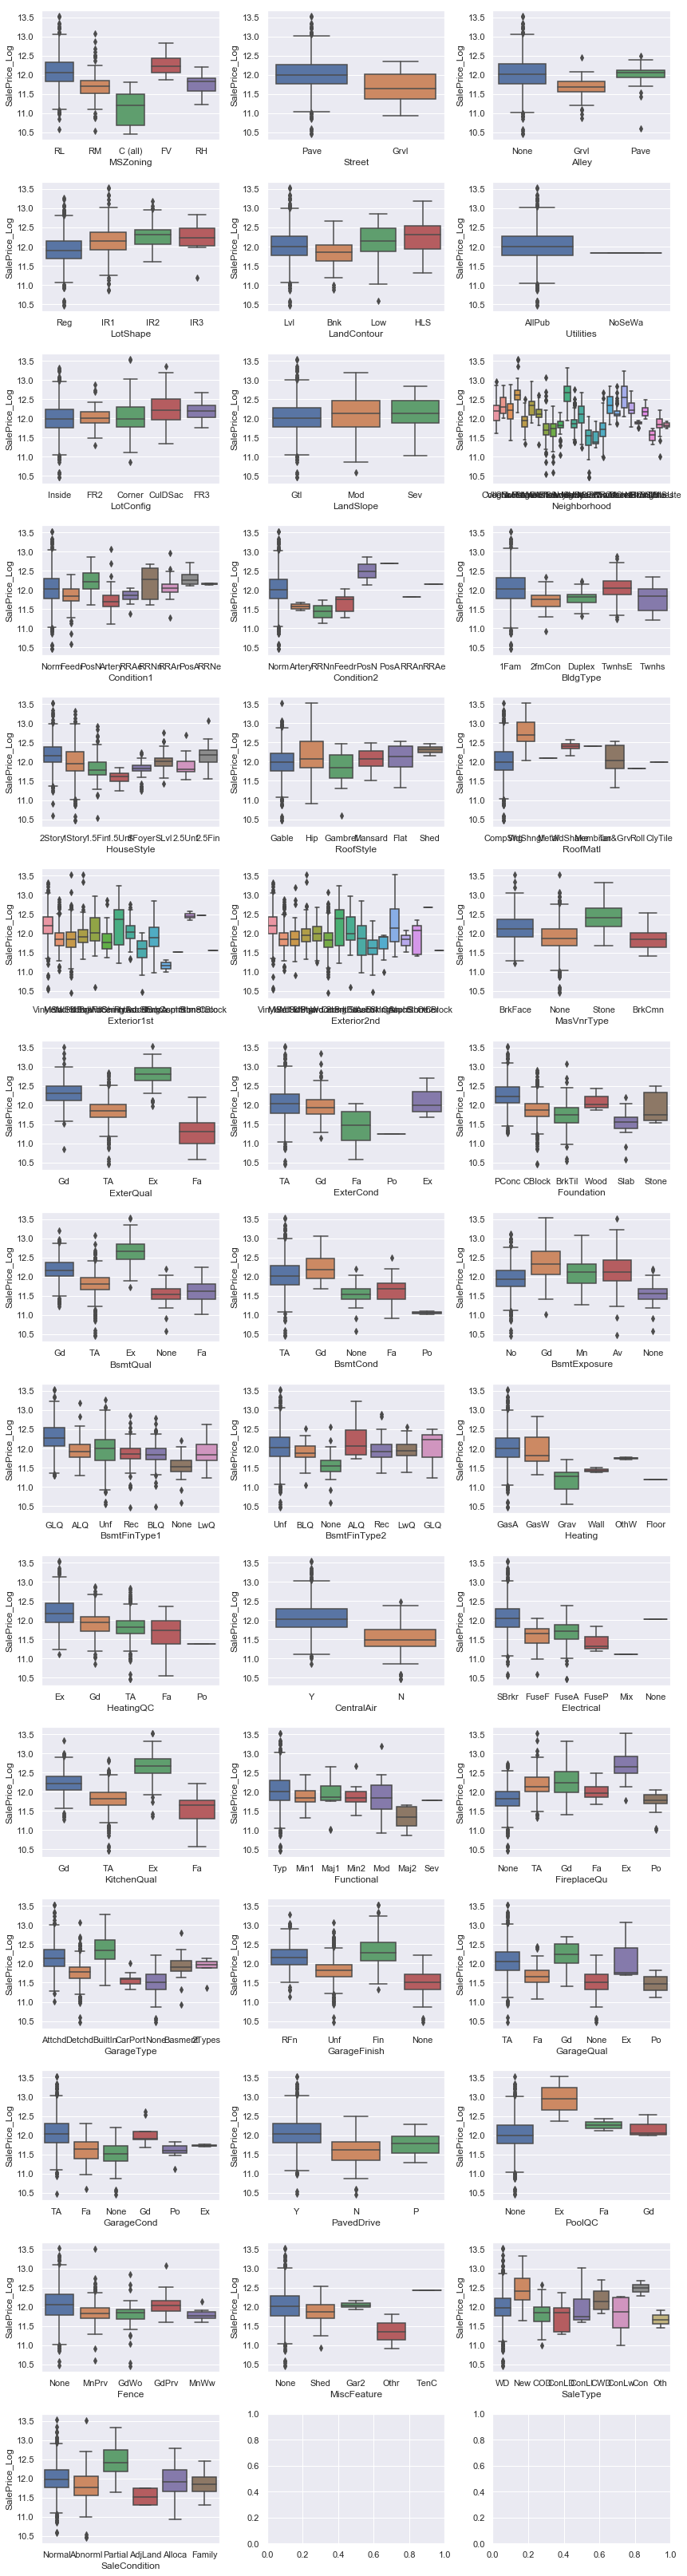

In [37]:
li_cat_feats = list(categorical_feats)#li_cat_feats has 43 entries ,all are categorical
nr_rows = 15
nr_cols = 3
target = train['SalePrice_Log']
#len(li_cat_feats)
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation. So I would drop those categorical features which has weak relation to target.

From the figures above, the strong categorical features are : 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' 

the weak categorical features are:
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'

In [38]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [39]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log,GrLivArea_Log,LotArea_Log
0,1,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,12.247699,7.444249,9.041922
1,2,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,12.109016,7.140453,9.169518
2,3,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,12.317171,7.487734,9.328123
3,4,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,11.849405,7.448334,9.164296
4,5,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,12.429220,7.695303,9.565214


In [40]:
train.shape

(1460, 81)

#  Part 2: Data wrangling


1.Drop all columns with only small correlation to SalePrice

2.Transform Categorical to numerical

3.Handling columns with missing data

4.Log values

5.Drop all columns with strong correlation to similar features


Numerical columns : drop similar and low correlation
Categorical columns : Transform to numerical

### Dropping all columns with weak correlation to SalePrice


In [41]:
#id_test = test['Id']

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [train]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [42]:
train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice_Log,GrLivArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,856,Y,SBrkr,856,2,Gd,8,0,2003.0,2,548,WD,12.247699,7.444249
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,1262,Y,SBrkr,1262,2,TA,6,1,1976.0,2,460,WD,12.109016,7.140453
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,920,Y,SBrkr,920,2,Gd,6,1,2001.0,2,608,WD,12.317171,7.487734
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,756,Y,SBrkr,961,1,Gd,7,1,1998.0,3,642,WD,11.849405,7.448334
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,1145,Y,SBrkr,1145,2,Gd,9,1,2000.0,3,836,WD,12.429220,7.695303


In [43]:
# view the shape of training data after dropping columns
train.shape

(1460, 24)

we can see that after dropping some columns, we only have 24 features left.

### Convert categorical columns to numerical

For those categorcial features where the EDA with boxplots seem to show a strong dependence of the SalePrice on the category, we transform the columns to numerical. To investigate the relation of the categories to SalePrice in more detail, we make violinplots for these features Also, we look at the mean of SalePrice as function of category.

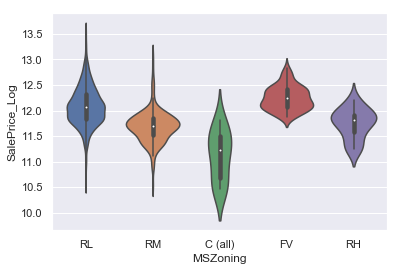

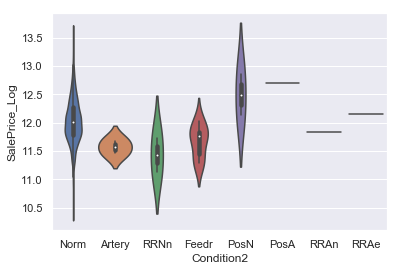

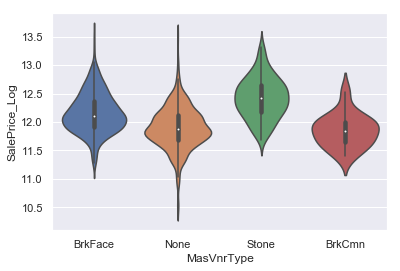

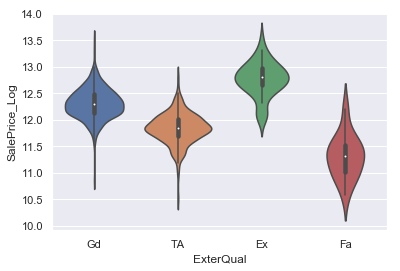

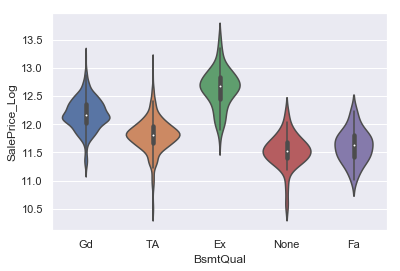

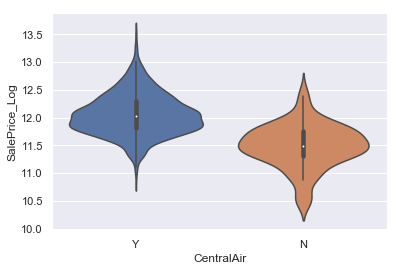

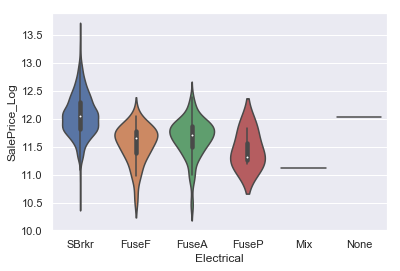

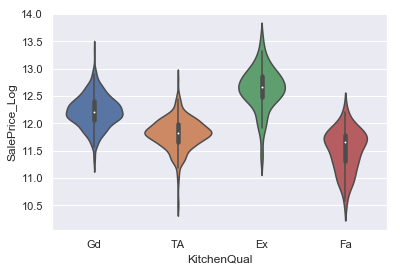

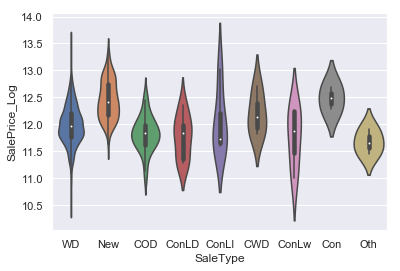

In [44]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y=target, data=train)
    plt.show()
    #sns.boxenplot(x=catg, y=target, data=df_train)
    #bp = df_train.boxplot(column=[target], by=catg)

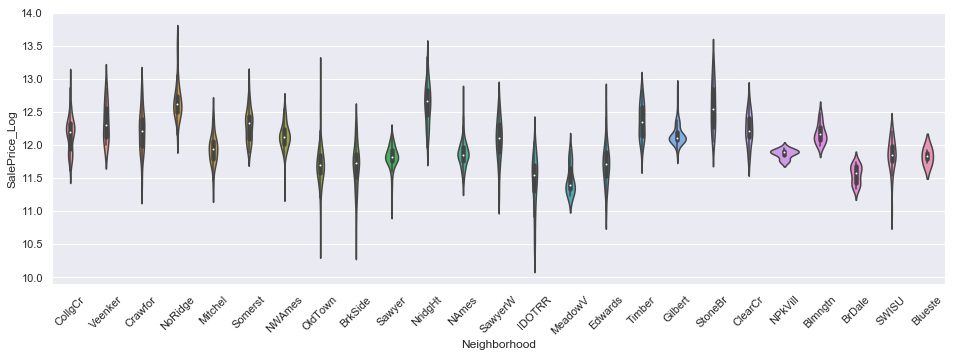

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [46]:
catg_list 

['MSZoning',
 'Condition2',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'SaleType']

In [47]:
train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice_Log,GrLivArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,856,Y,SBrkr,856,2,Gd,8,0,2003.0,2,548,WD,12.247699,7.444249
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,1262,Y,SBrkr,1262,2,TA,6,1,1976.0,2,460,WD,12.109016,7.140453
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,920,Y,SBrkr,920,2,Gd,6,1,2001.0,2,608,WD,12.317171,7.487734
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,756,Y,SBrkr,961,1,Gd,7,1,1998.0,3,642,WD,11.849405,7.448334
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,1145,Y,SBrkr,1145,2,Gd,9,1,2000.0,3,836,WD,12.429220,7.695303


In [48]:
train.shape

(1460, 24)

In [49]:
for catg in catg_list :
    catg_mean = train['SalePrice_Log'].groupby(train[catg]).mean()
    print(catg_mean)

MSZoning
C (all)    11.118275
FV         12.246621
RH         11.749848
RL         12.085891
RM         11.692901
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570046
Feedr     11.670639
Norm      12.025902
PosA      12.691584
PosN      12.493883
RRAe      12.154785
RRAn      11.827050
RRNn      11.435340
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853246
BrkFace    12.163635
None       11.896891
Stone      12.425142
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.764047
Fa    11.304554
Gd    12.311287
TA    11.837993
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.640397
Fa      11.617609
Gd      12.179888
None    11.529691
TA      11.810863
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491869
Y    12.061096
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660324
FuseF    11.539635
FuseP    11.446820
Mix      11.112463
None     12.028745
SBrkr    12.061470
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.633617
F

In [50]:
catg_mean = train['SalePrice_Log'].groupby(train['Neighborhood']).mean()
catg_mean


Neighborhood
Blmngtn    12.169421
Blueste    11.826543
BrDale     11.547874
BrkSide    11.679736
ClearCr    12.239905
CollgCr    12.163647
Crawfor    12.206664
Edwards    11.712321
Gilbert    12.155809
IDOTRR     11.446901
MeadowV    11.474533
Mitchel    11.933954
NAmes      11.868052
NPkVill    11.866484
NWAmes     12.130614
NoRidge    12.676003
NridgHt    12.619415
OldTown    11.703873
SWISU      11.838442
Sawyer     11.811475
SawyerW    12.090695
Somerst    12.296500
StoneBr    12.585490
Timber     12.363460
Veenker    12.344180
Name: SalePrice_Log, dtype: float64

In [51]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']



In [52]:
for df in [train]:
    #1
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    #2
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    
    #3
    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    #4
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    #5
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
    #6
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
    #7
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    
    #8
    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 
    #9
    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    #10
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4 

In [53]:
train.head(20)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice_Log,GrLivArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,856,Y,SBrkr,856,2,Gd,8,0,2003.0,2,548,WD,12.247699,7.444249,3,2,2,1,3,2,1,2,3,2
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,1262,Y,SBrkr,1262,2,TA,6,1,1976.0,2,460,WD,12.109016,7.140453,3,2,2,1,2,2,1,2,2,2
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,920,Y,SBrkr,920,2,Gd,6,1,2001.0,2,608,WD,12.317171,7.487734,3,2,2,1,3,2,1,2,3,2
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,756,Y,SBrkr,961,1,Gd,7,1,1998.0,3,642,WD,11.849405,7.448334,3,2,2,1,2,1,1,2,3,2
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,1145,Y,SBrkr,1145,2,Gd,9,1,2000.0,3,836,WD,12.429220,7.695303,3,3,2,1,3,2,1,2,3,2
5,RL,Mitchel,Norm,5,1993,1995,None,0.0,TA,Gd,796,Y,SBrkr,796,1,TA,5,0,1993.0,2,480,WD,11.870607,7.216709,3,1,2,1,2,2,1,2,2,2
6,RL,Somerst,Norm,8,2004,2005,Stone,186.0,Gd,Ex,1686,Y,SBrkr,1694,2,Gd,7,1,2004.0,2,636,WD,12.634606,7.434848,3,2,2,2,3,3,1,2,3,2
7,RL,NWAmes,Norm,7,1973,1973,Stone,240.0,TA,Gd,1107,Y,SBrkr,1107,2,TA,7,2,1973.0,2,484,WD,12.206078,7.644919,3,2,2,2,2,2,1,2,2,2
8,RM,OldTown,Norm,7,1931,1950,None,0.0,TA,TA,952,Y,FuseF,1022,2,TA,8,2,1931.0,2,468,WD,11.774528,7.480992,2,1,2,1,2,1,1,1,2,2
9,RL,BrkSide,Artery,5,1939,1950,None,0.0,TA,TA,991,Y,SBrkr,1077,1,TA,5,2,1939.0,1,205,WD,11.678448,6.981935,3,1,1,1,2,1,1,2,2,2


### Checking correlation to SalePrice for the new numerical columns

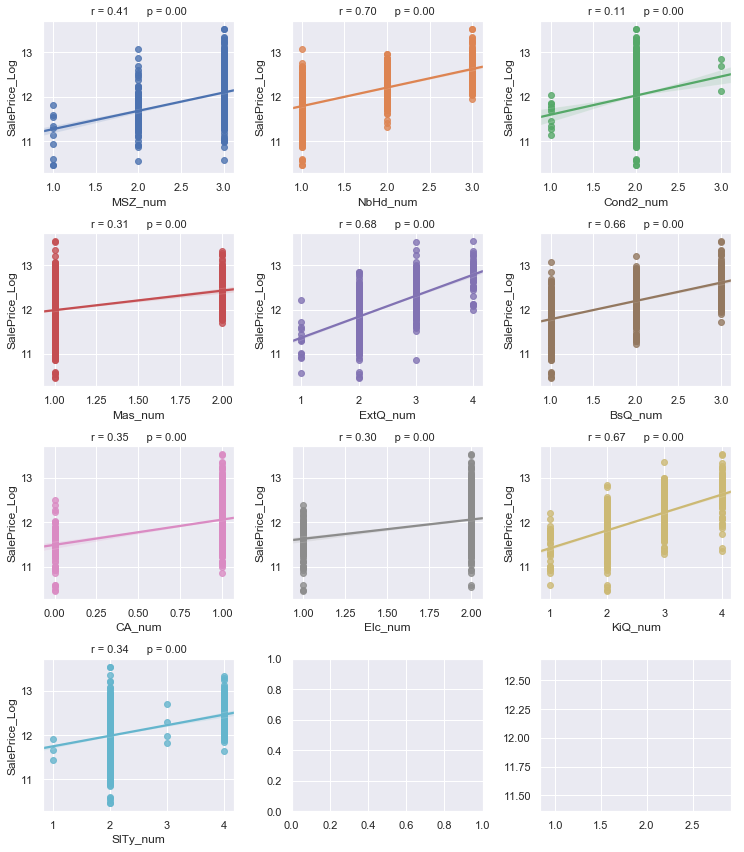

In [54]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(train[new_col_num[i]], train['SalePrice_Log'], ax = axs[r][c])
            stp = stats.pearsonr(train[new_col_num[i]], train['SalePrice_Log'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()  

There are few columns with quite large correlation to SalePrice (NbHd_num, ExtQ_num, BsQ_num, KiQ_num).
These will probably be useful for optimal performance of the Regressors in part 3.

Dropping the converted categorical columns and the new numerical columns with weak correlation

columns and correlation before dropping

In [55]:

catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = train.corr()
corr_abs_1 = corr1.abs()
nr_all_cols = len(train)#nr_all_cols = 1460
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, 'SalePrice_Log')['SalePrice_Log']

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= 0.4].index)


for df in [train] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)  

SalePrice_Log    1.000000
OverallQual      0.817185
GrLivArea_Log    0.730255
NbHd_num         0.696515
GarageCars       0.680625
ExtQ_num         0.678840
KiQ_num          0.667893
BsQ_num          0.659285
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
MSZ_num          0.409404
CA_num           0.351599
SlTy_num         0.335340
Mas_num          0.311370
Elc_num          0.304861
Cond2_num        0.105442
Name: SalePrice_Log, dtype: float64


### columns and correlation after dropping

In [56]:
corr2 = train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, 'SalePrice_Log')['SalePrice_Log']

print(ser_corr_2)

SalePrice_Log    1.000000
OverallQual      0.817185
GrLivArea_Log    0.730255
NbHd_num         0.696515
GarageCars       0.680625
ExtQ_num         0.678840
KiQ_num          0.667893
BsQ_num          0.659285
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
MSZ_num          0.409404
Name: SalePrice_Log, dtype: float64


In [57]:
train.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,7,2003,2003,196.0,856,856,2,8,0,2003.0,2,548,12.247699,7.444249,3,2,3,2,3
1,RL,6,1976,1976,0.0,1262,1262,2,6,1,1976.0,2,460,12.109016,7.140453,3,2,2,2,2
2,RL,7,2001,2002,162.0,920,920,2,6,1,2001.0,2,608,12.317171,7.487734,3,2,3,2,3
3,RL,7,1915,1970,0.0,756,961,1,7,1,1998.0,3,642,11.849405,7.448334,3,2,2,1,3
4,RL,8,2000,2000,350.0,1145,1145,2,9,1,2000.0,3,836,12.429220,7.695303,3,3,3,2,3


### List of all features with strong correlation to SalePrice_Log


after dropping all coumns with weak correlation

In [58]:
corr = train.corr()
corr




# new_top_corr_features = corr.index[tobechosen > 0.4]
# new_cols_abv_corr_limit = list(new_top_corr_features)

# new_cols_abv_corr_limit 
# nr_all_cols = len(train)
# corr_index = corr_abs.nlargest(nr_all_cols, 'SalePrice_Log')['SalePrice_Log']
# corr_index
# # print (corr_abs.nlargest(nr_all_cols, 'SalePrice_Log')['SalePrice_Log'])

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
OverallQual,1.000000,0.572323,0.550684,0.410238,0.537808,0.476224,0.550600,0.427452,0.396765,0.518018,0.600671,0.562022,0.817185,0.614210,0.247529,0.666556,0.726278,0.675384,0.673331
YearBuilt,0.572323,1.000000,0.592855,0.314745,0.391452,0.281986,0.468271,0.095589,0.147716,0.780555,0.537850,0.478954,0.586570,0.235518,0.426501,0.609187,0.598160,0.708922,0.530165
YearRemodAdd,0.550684,0.592855,1.000000,0.179186,0.291066,0.240379,0.439046,0.191740,0.112581,0.618130,0.420622,0.371600,0.565608,0.311464,0.207275,0.504823,0.587318,0.574113,0.625316
MasVnrArea,0.410238,0.314745,0.179186,1.000000,0.362452,0.342160,0.275730,0.280027,0.247906,0.249367,0.363778,0.372567,0.429532,0.362878,0.125921,0.386393,0.349637,0.321902,0.285190
TotalBsmtSF,0.537808,0.391452,0.291066,0.362452,1.000000,0.819530,0.323722,0.285573,0.339519,0.311700,0.434585,0.486665,0.612134,0.435852,0.259288,0.420273,0.470580,0.459401,0.432630
1stFlrSF,0.476224,0.281986,0.240379,0.342160,0.819530,1.000000,0.380637,0.409516,0.410531,0.227127,0.439317,0.489782,0.596981,0.551428,0.278006,0.354099,0.397835,0.363562,0.387027
FullBath,0.550600,0.468271,0.439046,0.275730,0.323722,0.380637,1.000000,0.554784,0.243671,0.468466,0.469672,0.405656,0.594771,0.653160,0.233624,0.501634,0.483949,0.502531,0.434648
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.280027,0.285573,0.409516,0.554784,1.000000,0.326114,0.140791,0.362289,0.337822,0.534422,0.825498,0.133368,0.299161,0.297903,0.235443,0.287279
Fireplaces,0.396765,0.147716,0.112581,0.247906,0.339519,0.410531,0.243671,0.326114,1.000000,0.045596,0.300789,0.269141,0.489450,0.468915,0.208163,0.303588,0.249335,0.232679,0.256409
GarageYrBlt,0.518018,0.780555,0.618130,0.249367,0.311700,0.227127,0.468466,0.140791,0.045596,1.000000,0.482534,0.476498,0.500449,0.239676,0.265717,0.545496,0.567008,0.651142,0.503115


In [59]:
tobechosen = abs(corr['SalePrice_Log']).sort_values(ascending=False)

newfeatures = tobechosen.index
newfeatures

Index(['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'NbHd_num',
       'GarageCars', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'MSZ_num'],
      dtype='object')

### Correlation Matrix 2 : All features with strong correlation to SalePrice

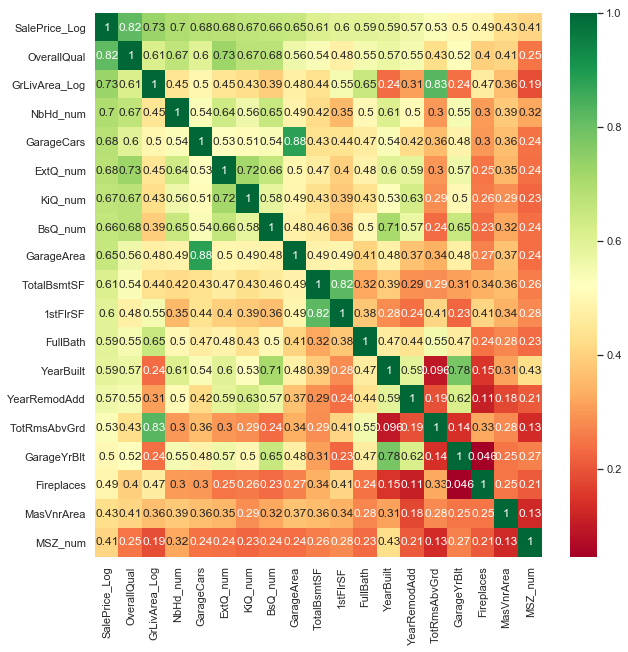

In [60]:

plt.figure(figsize=(10,10))
g = sns.heatmap(train[newfeatures].corr(),annot=True,cmap="RdYlGn")


 Check for Multicollinearity

Strong correlation of these features to other, similar features:

'GrLivArea_Log' and 'TotRmsAbvGrd'

'GarageCars' and 'GarageArea'

'TotalBsmtSF' and '1stFlrSF'

'YearBuilt' and 'GarageYrBlt'

Of those features we drop the one that has smaller correlation coeffiecient to Target.



In [61]:
cols = list(newfeatures)
cols
for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
    if col in cols: 
        cols.remove(col)

In [62]:
cols

['SalePrice_Log',
 'OverallQual',
 'GrLivArea_Log',
 'NbHd_num',
 'GarageCars',
 'ExtQ_num',
 'KiQ_num',
 'BsQ_num',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'MasVnrArea',
 'MSZ_num']

### List of features used for the Regressors in Part 3


In [63]:
feats = cols.copy()
feats.remove('SalePrice_Log')

print(feats)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'GarageCars', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num']


In [64]:
train_ml = train[feats].copy()

y = train['SalePrice_Log']


In [65]:
train_ml.head()

,OverallQual,GrLivArea_Log,NbHd_num,GarageCars,ExtQ_num,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num
0,7,7.444249,2,2,3,3,2,856,2,2003,2003,0,196.0,3
1,6,7.140453,2,2,2,2,2,1262,2,1976,1976,1,0.0,3
2,7,7.487734,2,2,3,3,2,920,2,2001,2002,1,162.0,3
3,7,7.448334,2,3,2,3,1,756,1,1915,1970,1,0.0,3
4,8,7.695303,3,3,3,3,2,1145,2,2000,2000,1,350.0,3


In [66]:
realnumber = np.real(train_ml['MasVnrArea'])

In [67]:
todataframe = pd.DataFrame(realnumber)

train_ml['MasVnrArea'] = todataframe.values
train_ml.head(20)

,OverallQual,GrLivArea_Log,NbHd_num,GarageCars,ExtQ_num,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num
0,7,7.444249,2,2,3,3,2,856,2,2003,2003,0,196.0,3
1,6,7.140453,2,2,2,2,2,1262,2,1976,1976,1,0.0,3
2,7,7.487734,2,2,3,3,2,920,2,2001,2002,1,162.0,3
3,7,7.448334,2,3,2,3,1,756,1,1915,1970,1,0.0,3
4,8,7.695303,3,3,3,3,2,1145,2,2000,2000,1,350.0,3
5,5,7.216709,1,2,2,2,2,796,1,1993,1995,0,0.0,3
6,8,7.434848,2,2,3,3,3,1686,2,2004,2005,1,186.0,3
7,7,7.644919,2,2,2,2,2,1107,2,1973,1973,2,240.0,3
8,7,7.480992,1,2,2,2,1,952,2,1931,1950,2,0.0,2
9,5,6.981935,1,1,2,2,1,991,1,1939,1950,2,0.0,3


### one hot encoding

In [68]:

li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZ_num']


In [69]:
"""all_data = pd.get_dummies(train[feats], columns=li_get_dummies, drop_first=True)"""

'all_data = pd.get_dummies(train[feats], columns=li_get_dummies, drop_first=True)'

In [70]:
all_data.head()

NameError: name 'all_data' is not defined

In [ ]:
"""train_ml = all_data[:train.shape[0]]""" #shape[0],Gives the number of rows
#train_ml.head()

### StandardScaler



In [71]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_ml_sc = sc.fit_transform(train_ml)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
train_ml_sc

array([[ 0.65147924,  0.52925951,  0.66024993, ..., -0.95122649,
         0.51141841,  0.43850235],
       [-0.07183611, -0.38184621,  0.66024993, ...,  0.60049493,
        -0.57441047,  0.43850235],
       [ 0.65147924,  0.65967461,  0.66024993, ...,  0.60049493,
         0.32306034,  0.43850235],
       ...,
       [ 0.65147924,  1.46994196,  0.66024993, ...,  2.15221636,
        -0.57441047,  0.43850235],
       [-0.79515147, -0.85447127, -0.84359547, ..., -0.95122649,
        -0.57441047,  0.43850235],
       [-0.79515147, -0.39613889, -0.84359547, ..., -0.95122649,
        -0.57441047,  0.43850235]])

In [73]:
train_ml_sc = pd.DataFrame(train_ml_sc)
train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.651479,0.529260,0.660250,0.311725,1.052302,0.735994,0.643519,-0.459303,0.789741,1.050994,0.878668,-0.951226,0.511418,0.438502
1,-0.071836,-0.381846,0.660250,0.311725,-0.689604,-0.771091,0.643519,0.466465,0.789741,0.156734,-0.429577,0.600495,-0.574410,0.438502
2,0.651479,0.659675,0.660250,0.311725,1.052302,0.735994,0.643519,-0.313369,0.789741,0.984752,0.830215,0.600495,0.323060,0.438502
3,0.651479,0.541511,0.660250,1.650307,-0.689604,0.735994,-0.922377,-0.687324,-1.026041,-1.863632,-0.720298,0.600495,-0.574410,0.438502
4,1.374795,1.282191,2.164095,1.650307,1.052302,0.735994,0.643519,0.199680,0.789741,0.951632,0.733308,0.600495,1.364570,0.438502


### Creating Datasets for ML algorithms

## I extract 30% data from training data as test data

In [74]:
training_data.head()

NameError: name 'training_data' is not defined

we can see that in column 'MasVnrArea' it has complexity number, so I would change these to real number.

In [75]:
realnumber = np.real(training_data['MasVnrArea'])

NameError: name 'training_data' is not defined

In [76]:
todataframe = pd.DataFrame(realnumber)

In [77]:
training_data['MasVnrArea'] = todataframe.values
training_data.head(20)

NameError: name 'training_data' is not defined

In [78]:
train_ml.head()

,OverallQual,GrLivArea_Log,NbHd_num,GarageCars,ExtQ_num,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num
0,7,7.444249,2,2,3,3,2,856,2,2003,2003,0,196.0,3
1,6,7.140453,2,2,2,2,2,1262,2,1976,1976,1,0.0,3
2,7,7.487734,2,2,3,3,2,920,2,2001,2002,1,162.0,3
3,7,7.448334,2,3,2,3,1,756,1,1915,1970,1,0.0,3
4,8,7.695303,3,3,3,3,2,1145,2,2000,2000,1,350.0,3


In [79]:
train_ml_sc.copy().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.651479,0.529260,0.660250,0.311725,1.052302,0.735994,0.643519,-0.459303,0.789741,1.050994,0.878668,-0.951226,0.511418,0.438502
1,-0.071836,-0.381846,0.660250,0.311725,-0.689604,-0.771091,0.643519,0.466465,0.789741,0.156734,-0.429577,0.600495,-0.574410,0.438502
2,0.651479,0.659675,0.660250,0.311725,1.052302,0.735994,0.643519,-0.313369,0.789741,0.984752,0.830215,0.600495,0.323060,0.438502
3,0.651479,0.541511,0.660250,1.650307,-0.689604,0.735994,-0.922377,-0.687324,-1.026041,-1.863632,-0.720298,0.600495,-0.574410,0.438502
4,1.374795,1.282191,2.164095,1.650307,1.052302,0.735994,0.643519,0.199680,0.789741,0.951632,0.733308,0.600495,1.364570,0.438502


In [80]:
train_ml_sc.copy().shape

(1460, 14)

In [81]:
from sklearn.model_selection import train_test_split

X = train_ml.copy()
y = train['SalePrice_Log']

training_data = pd.concat([X, y], axis=1) 
training_set,testing_set = train_test_split(training_data,test_size=0.3) 


X_sc = train_ml_sc.copy()#after StandardScaler 
y_sc = train['SalePrice_Log']


training_data_sc = pd.concat([X_sc, y_sc], axis=1) 
training_set_sc,testing_set_sc = train_test_split(training_data_sc,test_size=0.3) 

training_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 352 to 620
Data columns (total 15 columns):
OverallQual      1022 non-null int64
GrLivArea_Log    1022 non-null float64
NbHd_num         1022 non-null int64
GarageCars       1022 non-null int64
ExtQ_num         1022 non-null int64
KiQ_num          1022 non-null int64
BsQ_num          1022 non-null int64
TotalBsmtSF      1022 non-null int64
FullBath         1022 non-null int64
YearBuilt        1022 non-null int64
YearRemodAdd     1022 non-null int64
Fireplaces       1022 non-null int64
MasVnrArea       1022 non-null float64
MSZ_num          1022 non-null int64
SalePrice_Log    1022 non-null float64
dtypes: float64(3), int64(12)
memory usage: 127.8 KB


In [82]:
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.651479,0.529260,0.660250,0.311725,1.052302,0.735994,0.643519,-0.459303,0.789741,1.050994,0.878668,-0.951226,0.511418,0.438502
1,-0.071836,-0.381846,0.660250,0.311725,-0.689604,-0.771091,0.643519,0.466465,0.789741,0.156734,-0.429577,0.600495,-0.574410,0.438502
2,0.651479,0.659675,0.660250,0.311725,1.052302,0.735994,0.643519,-0.313369,0.789741,0.984752,0.830215,0.600495,0.323060,0.438502
3,0.651479,0.541511,0.660250,1.650307,-0.689604,0.735994,-0.922377,-0.687324,-1.026041,-1.863632,-0.720298,0.600495,-0.574410,0.438502
4,1.374795,1.282191,2.164095,1.650307,1.052302,0.735994,0.643519,0.199680,0.789741,0.951632,0.733308,0.600495,1.364570,0.438502


In [83]:
training_set.shape

(1022, 15)

In [84]:
testing_set.shape

(438, 15)

In [85]:
training_set.head()

,OverallQual,GrLivArea_Log,NbHd_num,GarageCars,ExtQ_num,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num,SalePrice_Log
352,5,7.013016,1,1,2,2,1,616,1,1941,1950,0,0.0,3,11.461643
649,4,6.445720,1,0,2,2,2,630,1,1970,1970,0,0.0,2,11.344519
1333,5,7.215240,1,1,2,3,1,803,1,1938,1995,0,0.0,2,11.740069
1421,6,6.974479,1,2,2,2,2,1069,2,1977,1977,1,0.0,3,11.755879
726,6,7.426549,2,2,3,3,2,880,2,1988,2007,1,260.0,3,12.310437


In [86]:
X_training = training_set.iloc[:, 0:14]
X_training.head()

,OverallQual,GrLivArea_Log,NbHd_num,GarageCars,ExtQ_num,KiQ_num,BsQ_num,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,MasVnrArea,MSZ_num
352,5,7.013016,1,1,2,2,1,616,1,1941,1950,0,0.0,3
649,4,6.445720,1,0,2,2,2,630,1,1970,1970,0,0.0,2
1333,5,7.215240,1,1,2,3,1,803,1,1938,1995,0,0.0,2
1421,6,6.974479,1,2,2,2,2,1069,2,1977,1977,1,0.0,3
726,6,7.426549,2,2,3,3,2,880,2,1988,2007,1,260.0,3


In [87]:
y_training = training_set.iloc[:, 14:]
y_training.head()

,SalePrice_Log
352,11.461643
649,11.344519
1333,11.740069
1421,11.755879
726,12.310437


In [88]:
X_testing = testing_set.iloc[:, 0:14]
X_testing.shape


(438, 14)

In [89]:
y_testing = testing_set.iloc[:, 14:]
y_testing.shape


(438, 1)

In [90]:
X_training_sc = training_set_sc.iloc[:, 0:14]
X_training_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1047,-0.795151,-1.109866,0.660250,0.311725,-0.689604,-0.771091,0.643519,-0.153754,-1.026041,0.752907,0.491040,-0.951226,-0.574410,0.438502
236,0.651479,-0.040777,0.660250,0.311725,1.052302,0.735994,0.643519,0.813058,0.789741,1.084115,0.927122,-0.951226,-0.031496,0.438502
686,0.651479,0.617398,0.660250,0.311725,1.052302,0.735994,0.643519,-0.418259,2.605522,1.183477,1.072482,-0.951226,-0.574410,0.438502
1119,-0.795151,-0.962098,-0.843595,-1.026858,-0.689604,-0.771091,-0.922377,-0.039743,-1.026041,-0.406319,-1.253287,-0.951226,-0.574410,0.438502
37,-0.795151,-0.299803,-0.843595,0.311725,-0.689604,-0.771091,-0.922377,0.546272,-1.026041,-0.571923,0.248772,0.600495,3.026553,0.438502


In [91]:
y_training_sc = training_set_sc.iloc[:, 14:]
y_training_sc.head()

,SalePrice_Log
1047,11.884496
236,12.130816
686,12.336557
1119,11.803361
37,11.938200


In [92]:
X_testing_sc = testing_set_sc.iloc[:, 0:14]
X_testing_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
115,-0.071836,0.051124,0.660250,0.311725,-0.689604,-0.771091,0.643519,-0.748890,0.789741,0.918511,0.684854,0.600495,5.680185,0.438502
1388,2.098110,0.591742,0.660250,1.650307,2.794208,2.243080,2.209415,1.570089,0.789741,1.150356,1.072482,2.152216,0.311980,0.438502
360,-0.071836,-1.355985,-0.843595,0.311725,-0.689604,-0.771091,0.643519,-0.386336,-1.026041,0.222975,-0.332670,0.600495,-0.574410,0.438502
894,-0.795151,0.205470,-0.843595,0.311725,-0.689604,-0.771091,-0.922377,-2.411167,0.789741,0.256096,-0.284216,-0.951226,-0.574410,0.438502
292,-0.795151,0.539764,-0.843595,-1.026858,-0.689604,-0.771091,-0.922377,-0.659961,-1.026041,-0.737526,1.120936,0.600495,-0.574410,0.438502


In [93]:
y_testing_sc = testing_set_sc.iloc[:, 14:]
y_testing_sc.head()

,SalePrice_Log
115,12.078245
1388,12.841328
360,11.957618
894,11.685693
292,11.782960


# Part 3: Scikit-learn basic regression models and comparison of results

We test the following Regressors from scikit-learn:
LinearRegression
Ridge
Lasso
Elastic Net
Stochastic Gradient Descent
DecisionTreeRegressor
RandomForestRegressor
SVR

Model tuning and selection with GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

## Linear Regression

1.best_score_ : Mean cross-validated score of the best_estimator
2.best_estimator_ : estimator or dict
Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 
3.best_params_ : dict
Parameter setting that gave the best results on the hold out data.

In [95]:

# def get_best_score(grid):
    
#     best_score = np.sqrt(-grid.best_score_)
#     print(best_score)    
#     print(grid.best_params_)
#     print(grid.best_estimator_)
    
#     return best_score

In [96]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv=10, verbose=1)
grid_linear.fit(X_training, y_training)

linear_score = grid_linear.score(X_testing,y_testing)

linear_score

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


0.8223993307884749

In [98]:
X_training.shape,y_testing.shape

((1022, 14), (438, 1))

In [97]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1377)

In [111]:
model = Sequential()
model.add(Dense(units = 6,activation='relu', input_dim=14))#一层hidden layer
# model.add(Dense(units = 6,activation='relu'))#一层hidden layer
model.add(Dense(1))


model.compile(loss='mse', optimizer='sgd')

#training
for step in range(900):
    cost = model.train_on_batch(X_training,y_training)   
    if step%100 == 0:
        print('train cost: ',cost)

train cost:  709476.8
train cost:  1.3639164e+18
train cost:  2.3988419e+16
train cost:  421911750000000.0
train cost:  7420588000000.0
train cost:  130512560000.0
train cost:  2295451600.0
train cost:  40372340.0
train cost:  710067.44


In [114]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_training.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics=['accuracy'])
    return model

In [115]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_33 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 41        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(X_training, y_training, validation_data=(X_training,y_training), epochs=150, batch_size=32)

Train on 1022 samples, validate on 1022 samples
Epoch 1/150
1022/1022 [==============================] - 0s 426us/step - loss: 4293.1488 - acc: 0.0000e+00 - val_loss: 686.4258 - val_acc: 0.0000e+00
Epoch 2/150
1022/1022 [==============================] - 0s 38us/step - loss: 243.4965 - acc: 0.0000e+00 - val_loss: 98.0362 - val_acc: 0.0000e+00
Epoch 3/150
1022/1022 [==============================] - 0s 40us/step - loss: 67.9998 - acc: 0.0000e+00 - val_loss: 38.4401 - val_acc: 0.0000e+00
Epoch 4/150
1022/1022 [==============================] - 0s 40us/step - loss: 31.3847 - acc: 0.0000e+00 - val_loss: 26.6904 - val_acc: 0.0000e+00
Epoch 5/150
1022/1022 [==============================] - 0s 41us/step - loss: 23.3796 - acc: 0.0000e+00 - val_loss: 20.7019 - val_acc: 0.0000e+00
Epoch 6/150
1022/1022 [==============================] - 0s 39us/step - loss: 16.6702 - acc: 0.0000e+00 - val_loss: 12.3757 - val_acc: 0.0000e+00
Epoch 7/150
1022/1022 [==============================] - 0s 40us/step -

1022/1022 [==============================] - 0s 43us/step - loss: 0.4621 - acc: 0.0000e+00 - val_loss: 0.4349 - val_acc: 0.0000e+00
Epoch 58/150
1022/1022 [==============================] - 0s 44us/step - loss: 0.5048 - acc: 0.0000e+00 - val_loss: 0.3947 - val_acc: 0.0000e+00
Epoch 59/150
1022/1022 [==============================] - 0s 42us/step - loss: 0.5781 - acc: 0.0000e+00 - val_loss: 0.5169 - val_acc: 0.0000e+00
Epoch 60/150
1022/1022 [==============================] - 0s 42us/step - loss: 0.4542 - acc: 0.0000e+00 - val_loss: 0.4031 - val_acc: 0.0000e+00
Epoch 61/150
1022/1022 [==============================] - 0s 42us/step - loss: 0.5026 - acc: 0.0000e+00 - val_loss: 0.6091 - val_acc: 0.0000e+00
Epoch 62/150
1022/1022 [==============================] - 0s 41us/step - loss: 0.5696 - acc: 0.0000e+00 - val_loss: 0.5076 - val_acc: 0.0000e+00
Epoch 63/150
1022/1022 [==============================] - 0s 42us/step - loss: 0.6977 - acc: 0.0000e+00 - val_loss: 0.4219 - val_acc: 0.0000e+0

1022/1022 [==============================] - 0s 40us/step - loss: 0.9709 - acc: 0.0000e+00 - val_loss: 0.3542 - val_acc: 0.0000e+00
Epoch 114/150
1022/1022 [==============================] - 0s 42us/step - loss: 0.9262 - acc: 0.0000e+00 - val_loss: 1.2699 - val_acc: 0.0000e+00
Epoch 115/150
1022/1022 [==============================] - 0s 45us/step - loss: 0.7864 - acc: 0.0000e+00 - val_loss: 1.1563 - val_acc: 0.0000e+00
Epoch 116/150
1022/1022 [==============================] - 0s 45us/step - loss: 0.9920 - acc: 0.0000e+00 - val_loss: 0.3325 - val_acc: 0.0000e+00
Epoch 117/150
1022/1022 [==============================] - 0s 45us/step - loss: 0.7068 - acc: 0.0000e+00 - val_loss: 0.7287 - val_acc: 0.0000e+00
Epoch 118/150
1022/1022 [==============================] - 0s 44us/step - loss: 1.7255 - acc: 0.0000e+00 - val_loss: 0.3778 - val_acc: 0.0000e+00
Epoch 119/150
1022/1022 [==============================] - 0s 39us/step - loss: 4.3748 - acc: 0.0000e+00 - val_loss: 6.0555 - val_acc: 0.0

### Ridge

In [608]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=10, verbose=1)
grid_ridge.fit(X_training, y_training)
ridge_score = grid_ridge.score(X_testing,y_testing)
ridge_score

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.0s finished


0.8694303273250961

### LASSO 

In [609]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=10, verbose=1)
grid_lasso.fit(X, y)

lasso_score = grid_lasso.score(X_testing,y_testing)
lasso_score

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    1.8s finished


0.8779160865639343

### Elastic Net 

In [610]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv=10, verbose=1)
grid_enet.fit(X_sc, y_sc)

enet_score = grid_enet.score(X_testing_sc,y_testing_sc)
enet_score

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    1.5s finished


0.8561653597071917

### SGDRegressor

In [611]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
parameters = {'max_iter' :[10000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd, parameters, cv=10, verbose=1)
grid_sgd.fit(X_sc, y_sc)

sgd_score = grid_sgd.score(X_testing_sc,y_testing_sc)
sgd_score

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.3s finished


0.858864772115462

### DecisionTreeRegressor 

In [612]:
from sklearn.tree import DecisionTreeRegressor

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, refit=True, verbose=1)
grid_dtree.fit(X, y)

dtree_score = grid_dtree.score(X_testing,y_testing)

dtree_score

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   17.3s finished


0.8947320759608544

### RandomForestRegressor


In [613]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, refit=True, verbose=1)
grid_rf.fit(X, y)

rf_score = grid_rf.score(X_testing,y_testing)
rf_score

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   22.0s finished


0.9545464099635957

### Comparison plot: R^2 of all models

In [614]:
list_scores = [linear_score, ridge_score, lasso_score, enet_score, sgd_score, dtree_score, rf_score]
list_regressors = ['Linear','Ridge','Lasso','ElaNet','SGD','DTr','RF']

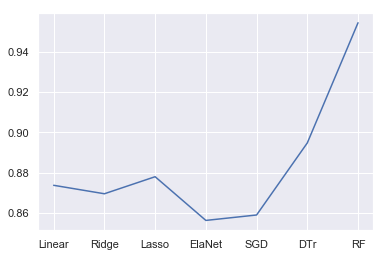

In [615]:
import matplotlib.pyplot as plt
plt.plot(list_regressors,list_scores )
plt.show()

#  Conclusion

randomforest can build best model

In [174]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1022, 289), (438, 289), (1022,), (438,))

In [175]:
X_train.head(3)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,0,0,0,1,0,0,1,0,0,0,...,645,576,36,0,0,0,0,0,2,2009
682,0,0,0,1,0,0,1,0,0,0,...,431,307,0,0,0,0,0,0,11,2008
960,0,0,0,1,0,0,1,0,0,1,...,0,117,0,0,0,0,0,0,2,2010


In [176]:
# Algorithms used for modeling
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import  RandomForestRegressor

# Model selection packages for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [177]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_CV_train(model):
    # .get_n_splits(train.values)：Returnsthe number of splitting iterations in the cross-validator
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    
    #sign-flip the outcome of the scorer
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)


In [178]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())












rmse on train 226.22853121869585
rmse on train 0.019372009610054607


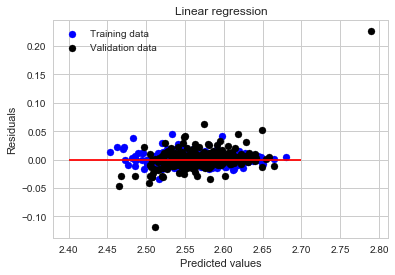

In [179]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2.40, xmax = 2.70, color = "red")
plt.show()

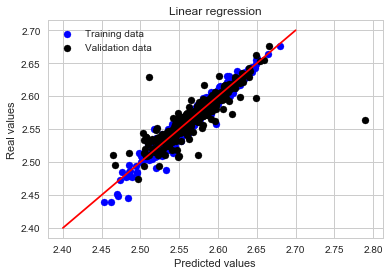

In [180]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([2.40, 2.70], [2.40, 2.70], c = "red")
plt.show()